In [1]:
install.packages("fUnitRoots")

library("fUnitRoots")
library(lmtest)
library("forecast")
library(FitAR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org
Loading required package: zoo

Attaching package: ‘zoo’

The following object is masked from ‘package:timeSeries’:

    time<-

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

This is forecast 6.2 

Loading required package: lattice
Loading required package: leaps
Loading required package: ltsa
Loading required package: bestglm

Attaching package: ‘FitAR’

The following object is masked from ‘package:forecast’:

    BoxCox



In [2]:
data <- read.csv("threedaydata.csv",header=TRUE)
tsData <- ts(data[,-1],f=12,s=1)


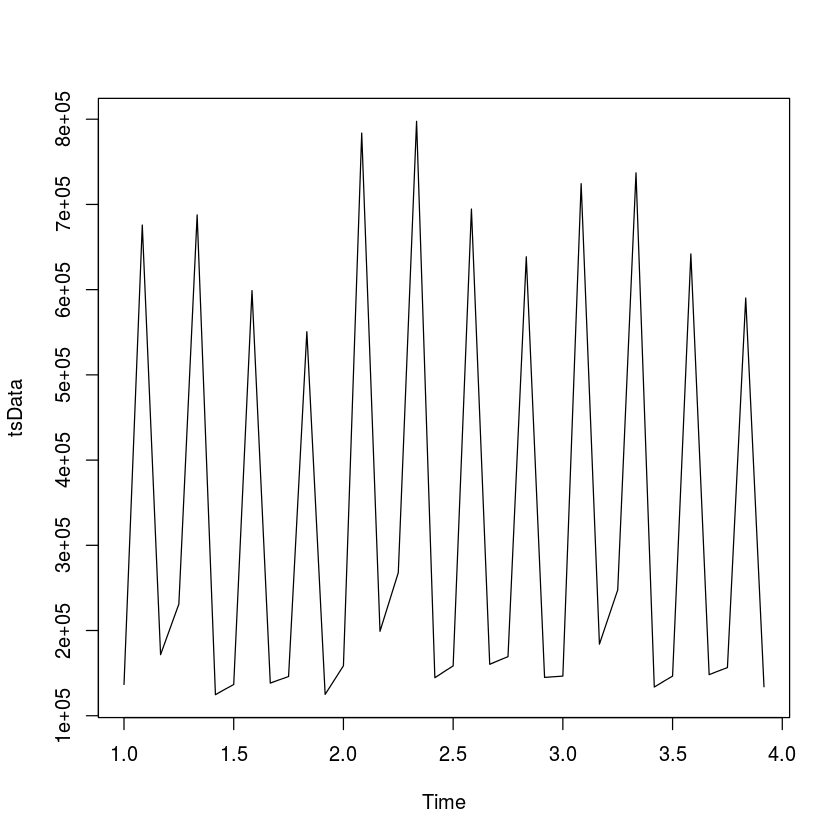

In [3]:
plot(tsData)

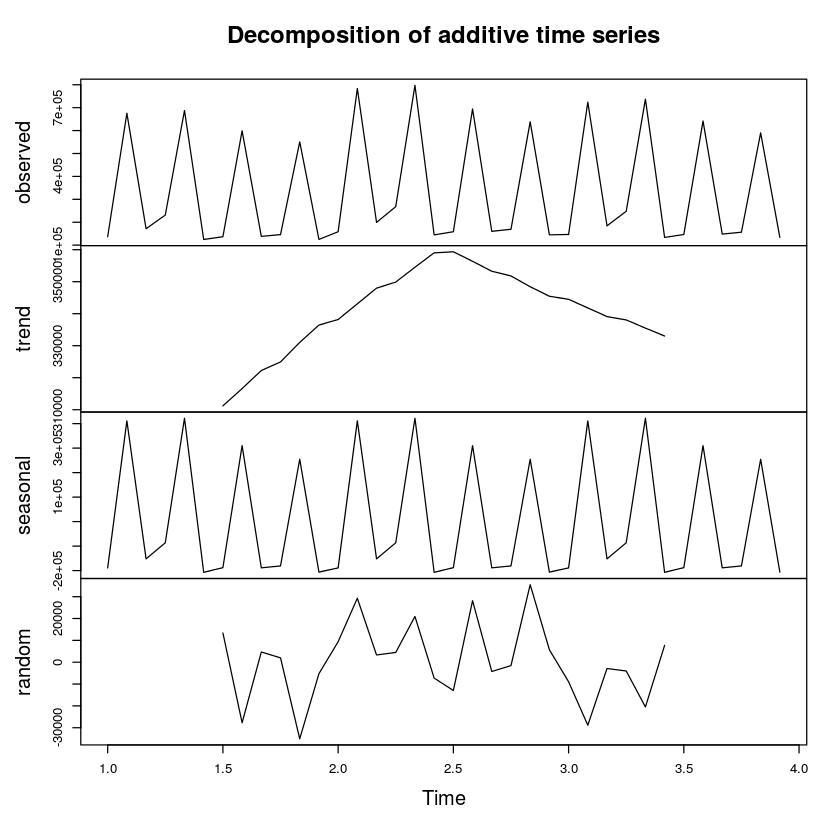

In [4]:
timeseriescomponents <- decompose(tsData)
plot(timeseriescomponents)


Title:
 KPSS Unit Root Test

Test Results:
  NA

Description:
 Wed Apr 24 19:22:40 2019 by user: 


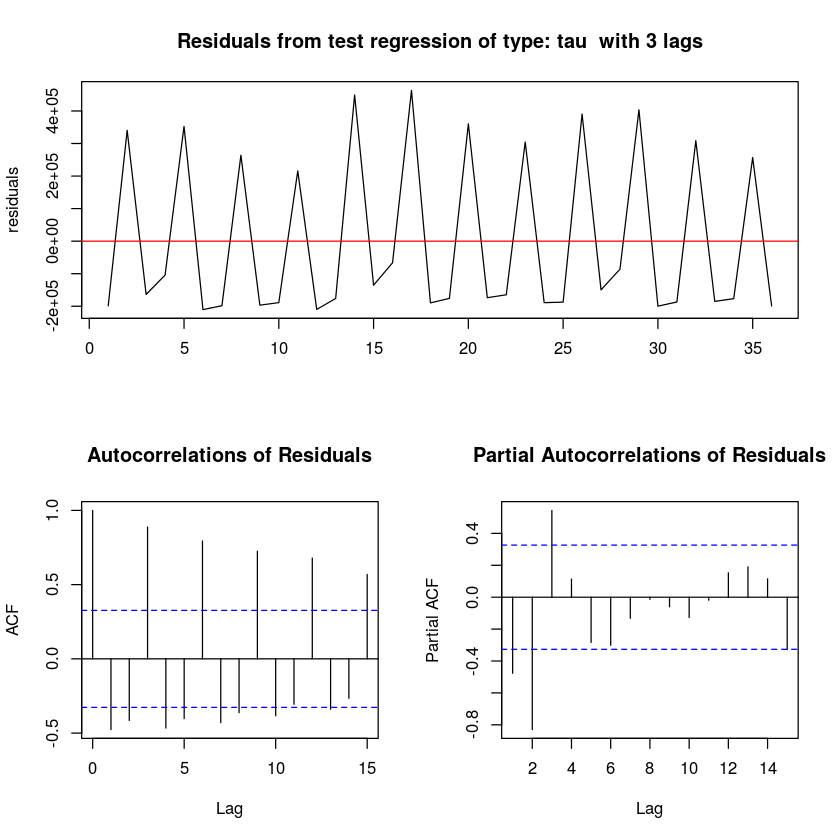

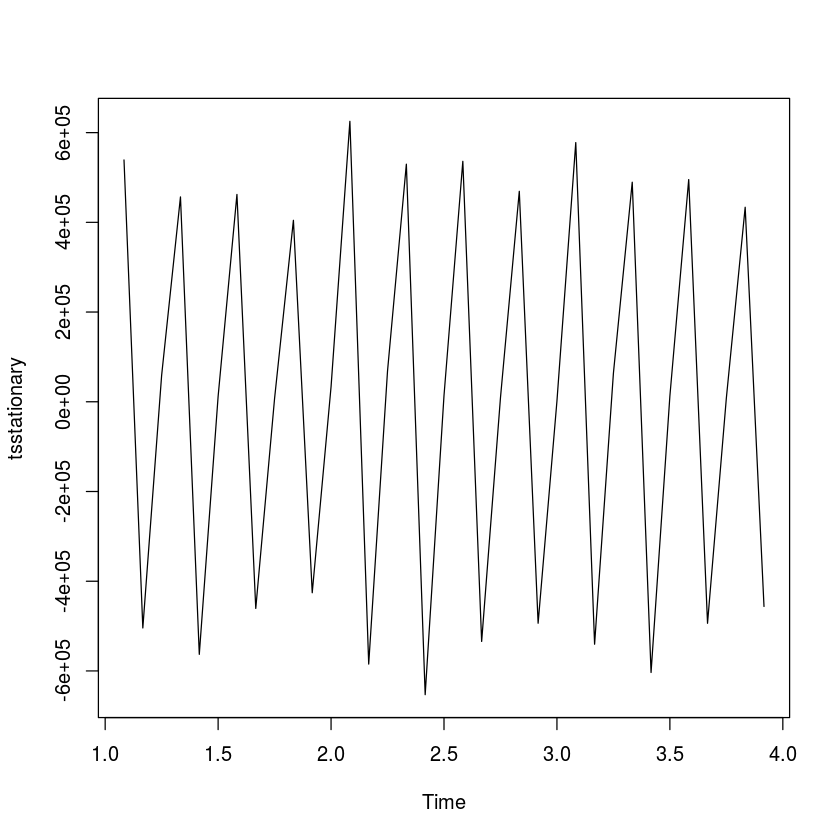

In [5]:
library("fUnitRoots")
urkpssTest(tsData, type = c("tau"), lags = c("short"),use.lag = NULL, doplot = TRUE)
tsstationary<-diff(tsData, differences=1)
plot(tsstationary)
acf(tsData,lag.max=34)

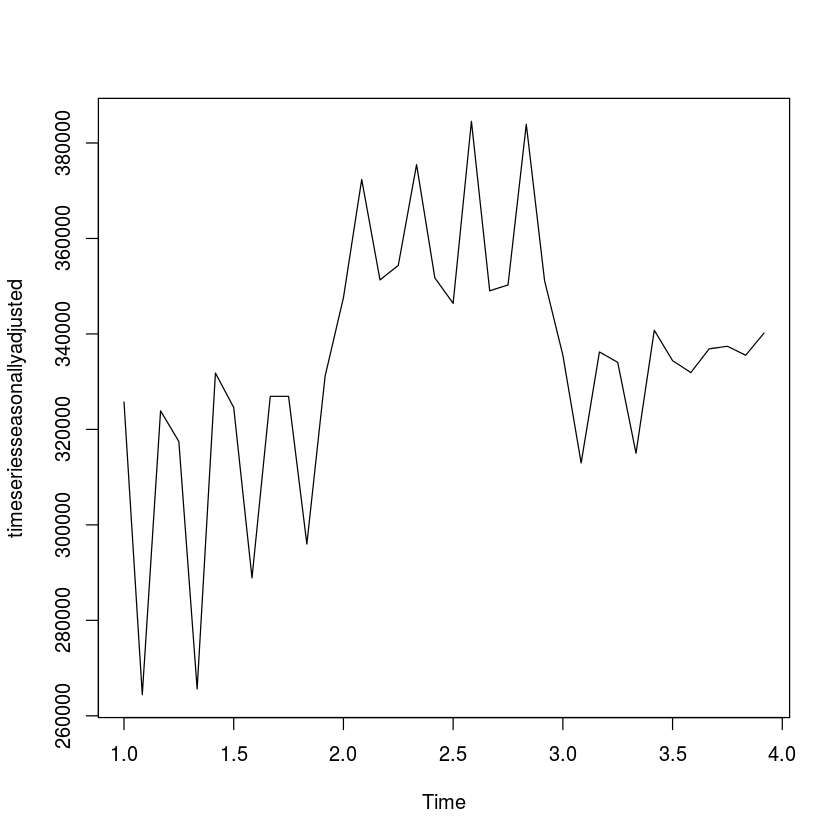

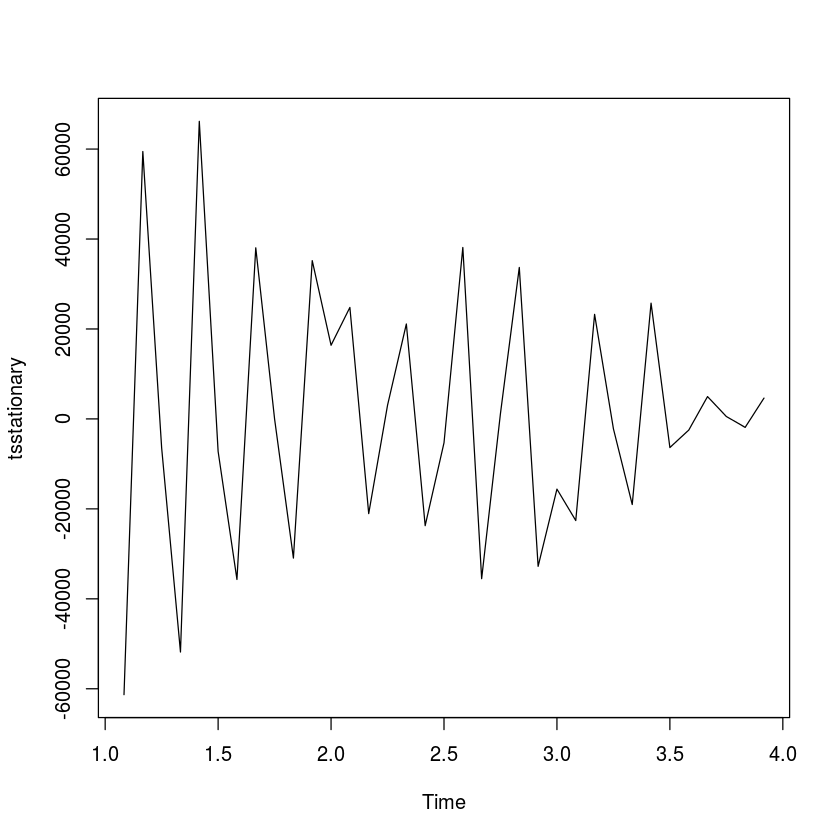

In [6]:
timeseriesseasonallyadjusted <- tsData- timeseriescomponents$seasonal
plot(timeseriesseasonallyadjusted)
tsstationary <- diff(timeseriesseasonallyadjusted, differences=1)
plot(tsstationary)
par(mfrow=c(2,1))
acf(tsstationary, lag.max=34) 
pacf(tsstationary, lag.max=34)

In [7]:
fitARIMA<-arima(tsData, order=c(1,1,1),seasonal = list(order = c(1,0,0), period = 12),method="ML")
fitARIMA

Warning message:
In sqrt(diag(x$var.coef)): NaNs producedWarning message:
In sqrt(diag(x$var.coef)): NaNs produced


Call:
arima(x = tsData, order = c(1, 1, 1), seasonal = list(order = c(1, 0, 0), period = 12), 
    method = "ML")

Coefficients:
          ar1      ma1  sar1
      -0.2228  -0.5694     1
s.e.   0.2063   0.1484   NaN

sigma^2 estimated as 1.066e+09:  log likelihood = -427.05,  aic = 862.09

Warning message:
In sqrt(diag(se)): NaNs produced


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1  -0.22277    0.20625 -1.0801 0.2801071    
ma1  -0.56938    0.14837 -3.8376 0.0001242 ***
sar1  0.99997         NA      NA        NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


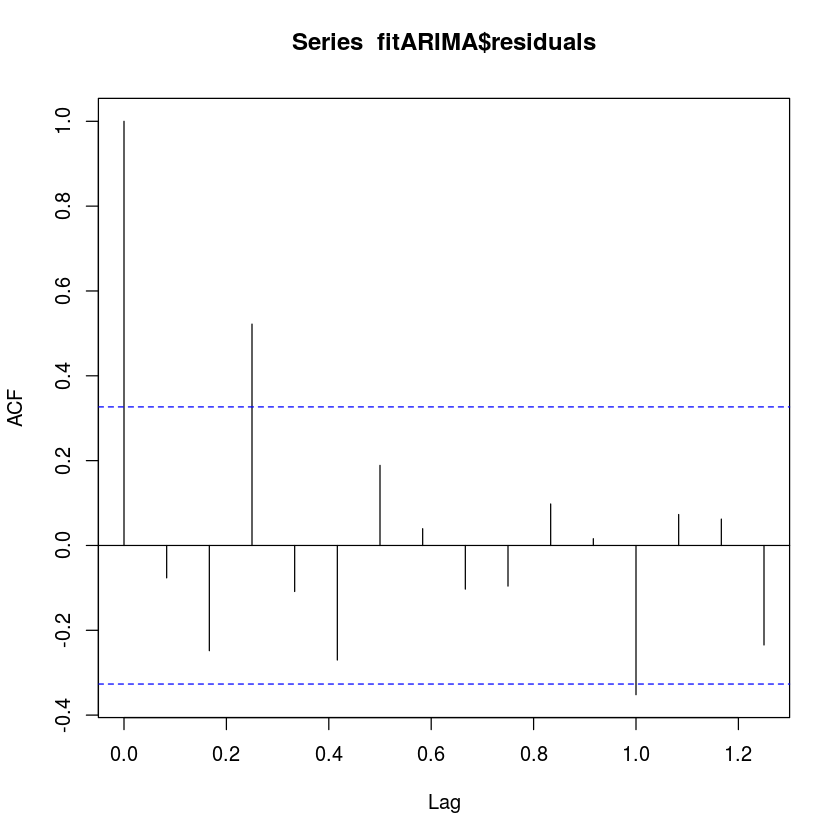

In [8]:
coeftest(fitARIMA)
par(mfrow=c(1,1))
acf(fitARIMA$residuals)


 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : 1000.778
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : Inf *
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0) with zero mean     : 1035.856
 ARIMA(0,0,0)(1,0,0)[12] with non-zero mean : Inf *
 ARIMA(0,0,0)(0,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(1,0,0) with non-zero mean : 993.7439
 ARIMA(1,0,1) with non-zero mean : 983.4745
 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(1,0,1) with zero mean     : 1022.237
 ARIMA(1,0,1)(1,0,0)[12] with non-zero mean : Inf *
 ARIMA(1,0,1)(0,0,1)[12] with non-zero mean : Inf
 ARIMA(1,0,1)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,1) with non-zero mean : Inf
 ARIMA(2,0,1) with non-zero mean : 930.2845
 ARIMA(2,0,0) with non-zero mean : 951.871
 ARIMA(3,0,2) with non-zero mean : Inf
 ARIMA(2,0,1) with zero mean     : Inf
 ARIMA(2,0,1)(1,0,0)[12] with non-zero mean : 917.6908
 ARIMA(2,0,1)(1,0,1)[12] 

Series: tsData 
ARIMA(2,0,1)(1,0,0)[12] with non-zero mean 

Coefficients:
          ar1      ar2     ma1    sar1  intercept
      -0.8367  -0.7581  0.8039  0.7982  325977.50
s.e.   0.1387   0.1378  0.0797  0.1368   16638.68

sigma^2 estimated as 2.981e+09:  log likelihood=-451.4
AIC=914.79   AICc=917.69   BIC=924.3

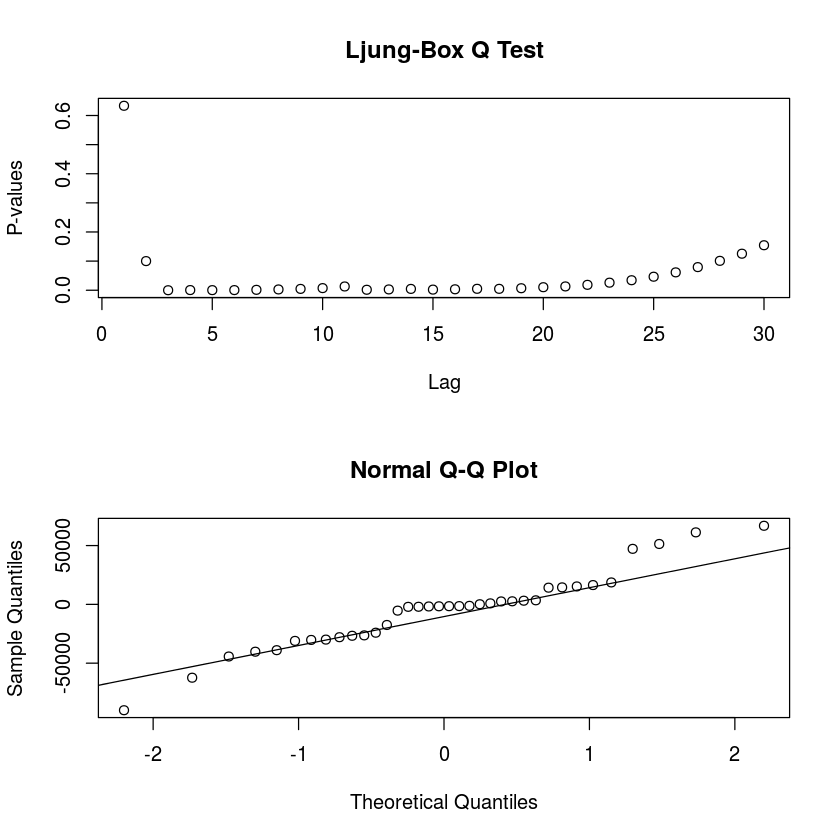

In [9]:
boxresult<-LjungBoxTest (fitARIMA$residuals,k=2,StartLag=1) # residual?? or the original series?
par(mfrow=c(2,1))
plot(boxresult[,3],main="Ljung-Box Q Test", ylab="P-values", xlab="Lag")
qqnorm(fitARIMA$residuals)
qqline(fitARIMA$residuals)
auto.arima(tsData, trace=TRUE)



ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


$pred
       Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
4 119000.3 700509.3 159346.1 223076.1 712525.1 109188.2 121978.4 617388.7
       Sep      Oct      Nov      Dec
4 123712.3 131998.3 565652.1 109486.9

$se
       Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
4 32645.04 33342.71 35624.94 37362.85 39106.91 40758.44 42349.46 43882.01
       Sep      Oct      Nov      Dec
4 45362.99 46797.09 48188.54 49540.91


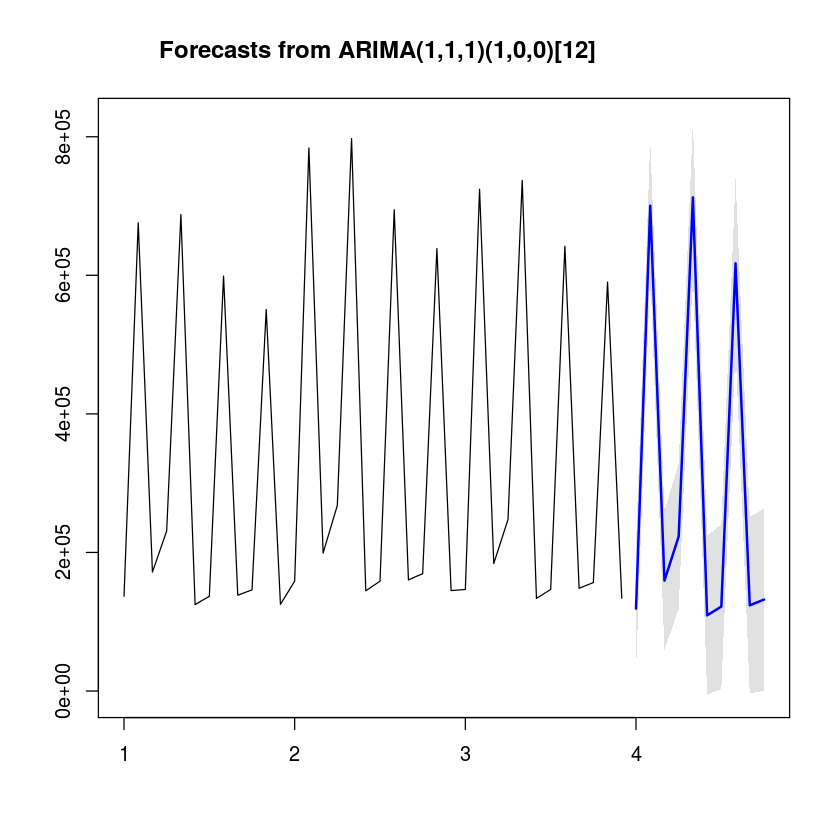

In [10]:

par(mfrow=c(1,1))
predict(fitARIMA,n.ahead = 12)
futurVal <- forecast.Arima(fitARIMA,h=10, level=c(99.5))
plot.forecast(futurVal)
